## Multiple regression model for Forecasting House Prices using Gradient Descent Algorithm

#### Assignment II

#### MRArabshahi

In [1]:
import pandas as pd
import numpy as np 
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

### Reading data from Excel

In [3]:
sales = pd.read_excel("C:\\Users\\Mohammad Reza\\Desktop\\Corsera\\Machine Learning-Regression\\W2\\6. Assignments\\2\\kc_house_data.xlsx")

House_Sales_trainingdata = pd.read_excel("C:\\Users\\Mohammad Reza\\Desktop\\Corsera\\Machine Learning-Regression\\W2\\6. Assignments\\2\\kc_house_train_data.xlsx")
#House_Sales_trainingdata

House_Sales_testdata = pd.read_excel("C:\\Users\\Mohammad Reza\\Desktop\\Corsera\\Machine Learning-Regression\\W2\\6. Assignments\\2\\kc_house_test_data.xlsx")
#House_Sales_testdata

features_pd  = sales['lat']
feature_matrix = features_pd.to_numpy()
#sales['constant'] = 1
#sales
#type (features_pd)
#type (feature_matrix)


In [4]:
def get_numpy_data(dataset, features, output):
    
    dataset['constant'] = 1 # this is how you add a constant column to a dataset
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_pd  = dataset[features]
    # the following line will convert the features_sframe into a numpy matrix:
    feature_matrix = features_pd.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray = dataset[output]
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

In [30]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
print ('Features :',example_features[0,:])
print ('Price :', example_output[0])

Features : [   1 1180]
Price : 221900


In [6]:
my_weights = np.array([0., 0.]) # the example weights
my_features = example_features[0,:] # we'll use the first data point
predicted_value = np.dot(my_features, my_weights)
print ('Predicted_value =', predicted_value)



Predicted_value = 0.0


In [7]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [8]:
test_predictions = predict_output(example_features, my_weights)
#test_predictions                             an array of predictions
print (test_predictions[0])                   # should be 1181.0
print (test_predictions[1])                   # should be 2571.0
errors = test_predictions-example_output
print (errors) 


0.0
0.0
[-221900. -538000. -180000. ... -402101. -400000. -325000.]


### Computing the derivative


In [27]:
def feature_derivative(errors, feature_matrix):
    derivative = 2*np.dot(errors, feature_matrix)
    return(derivative)

In [29]:
test_derivative = feature_derivative(errors, example_features)
#test_predictions                             an array of predictions
print (test_derivative[0])                   # should be 1181.0
print (test_derivative[1])                   # should be 2571.0
print (example_features)


IndexError: invalid index to scalar variable.

In [11]:
from math import sqrt

## Gradient Descent

In [12]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False
    num_steps = 0
    weights = np.array(initial_weights)
    while not converged:
        predicted_value = predict_output(feature_matrix, weights)
        errors = predicted_value-output
        gradient_sum_squares = 0 # initialize the gradient
        # while not converged, update each weight individually:
        for i in range(len(weights)):
            weight_derivative = feature_derivative(errors, feature_matrix[:,i])
            
            # add the squared value of the derivative to the gradient magnitude (for assessing convergence)
            gradient_sum_squares += weight_derivative**2
            
            # subtract the step size times the derivative from the current weight
            weights[i] -= step_size * weight_derivative
            
            # update the weight based on step size and derivative:
        num_steps += 1    
        gradient_magnitude = sqrt(gradient_sum_squares)
        if gradient_magnitude < tolerance:
            print ('step: {}'.format(num_steps))
            print ('gradient: {}\n'.format(gradient_magnitude))
            converged = True
    return(weights)

###  Gradient descent for simple linear regression

In [97]:
# let's test out the gradient descent
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(House_Sales_trainingdata, simple_features, my_output)
initial_weights = np.array([-47000., 1.])

print (range(len(initial_weights))) # range gives sequence numbers between 0 and 2 ==> 0 1
print (range(len(simple_feature_matrix)))
step_size = 7e-12
tolerance = 2.5e7

range(0, 2)
range(0, 17384)


In [98]:
print (simple_feature_matrix)
print (output)

[[   1 1180]
 [   1 2570]
 [   1  770]
 ...
 [   1 1530]
 [   1 1600]
 [   1 1020]]
[221900 538000 180000 ... 360000 400000 325000]


In [99]:
coeffs = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)
print (coeffs)

step: 12
gradient: 18320017.26821198

[-46999.88716555    281.91211918]


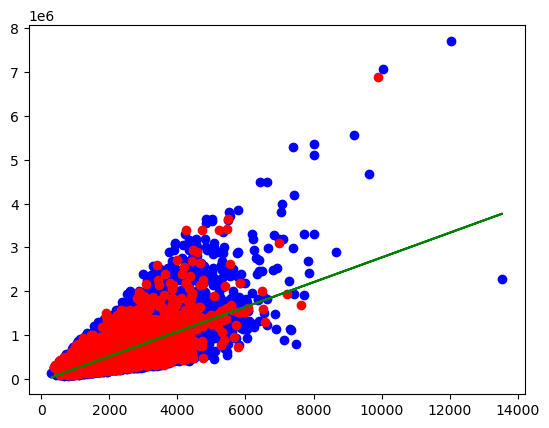

In [100]:
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.scatter(House_Sales_trainingdata.sqft_living, House_Sales_trainingdata.price, color='blue')
ax1.scatter(House_Sales_testdata.sqft_living, House_Sales_testdata.price, color='red')
plt.plot(House_Sales_trainingdata.sqft_living, coeffs[1]*House_Sales_trainingdata.sqft_living + coeffs[0], '-g')



### Prediction using test data

In [101]:
(test_simple_feature_matrix, test_output) = get_numpy_data(House_Sales_testdata, simple_features, my_output)

In [102]:
preds_test = predict_output(test_simple_feature_matrix, coeffs)

In [103]:
print ('First house predicted price for model 1:', preds_test[0])
print ('First house actual price:', test_output[0])

First house predicted price for model 1: 356134.4432550024
First house actual price: 310000


In [104]:
def rss_compute (preds_test, test_output):
    rss = sum((preds_test-test_output) ** 2)
    return (rss)

In [109]:
example_rss=rss_compute (preds_test, test_output)
print("Residual sum of Squares: %.2f" % example_rss)

Residual sum of Squares: 275400044902128.78


###  Gradient descent for multiple linear regression

In [106]:
# let's test out the gradient descent
multiple_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(multiple_feature_matrix, output) = get_numpy_data(House_Sales_trainingdata, multiple_features, my_output)
initial_weights = np.array([-100000., 1., 1.])
step_size = 4e-12
tolerance = 1e9
coeffs = regression_gradient_descent(multiple_feature_matrix, output, initial_weights, step_size, tolerance)
print (coeffs)


step: 274
gradient: 997480716.6303005

[-9.99999688e+04  2.45072603e+02  6.52795267e+01]


### Prediction using test data for multiple regression model

In [107]:
(test_simple_feature_matrix, test_output) = get_numpy_data(House_Sales_testdata, multiple_features, my_output)
preds_test2 = predict_output(test_simple_feature_matrix, coeffs)
print ('First house predicted price for model 2:', preds_test[0])
print ('First house actual price:', test_output[0])

First house predicted price for model 2: 356134.4432550024
First house actual price: 310000


In [108]:
example_rss2 = rss_compute(preds_test2, test_output)
print("Residual sum of Squares: %.2f" % example_rss2)

Residual sum of Squares: 270263443629803.31
